In [37]:
import json
import numpy as np
from pprint import pprint

In [3]:
with open('../src/api/data/atel/entities.json','r') as f:
    data = json.load(f)

In [14]:
keys = list(data.keys())
pprint((data[keys[10]]))
keys[9]

{'coordinate_system': None,
 'coordinates': None,
 'date': '19 Mar 1998; 16:59 UT',
 'event_type': ['pulsation'],
 'messenger_type': ['electromagnetic radiation'],
 'object_name': ['XTE J1858+034'],
 'object_type': ['pulsar']}


'10'

In [12]:
def no_of_object(entry):
    if type(entry) == list:
        return len(entry)
    elif entry == None:
        return 0
    return 1

In [22]:
mkeys = {}


possible_multfields = ["object_name","coordinates","date"]
for key in keys:
    atel = data[key]
    mfields = {}
    for field in possible_multfields:
        if no_of_object(atel[field]) > 1:
            mfields[field] = len(atel[field])
    if len(mfields) > 0:
        mkeys[key] = mfields

In [23]:
with open("mult_atels.json","w") as f:
    json.dump(mkeys,f)

In [20]:
list(mkeys.keys())[0],data[list(mkeys.keys())[0]]

('20',
 {'event_type': ['gamma-ray burst'],
  'object_name': ['Gamma-Ray Burst'],
  'object_type': [],
  'date': '18 May 1998; 22:39 UT',
  'messenger_type': ['electromagnetic radiation'],
  'coordinates': ['319.25 -67.238', '319.3527 -67.2550'],
  'coordinate_system': 'J2000'})

In [26]:
import matplotlib.pyplot as plt
coolength = []
for entry in mkeys.values():
    try:
        coolength.append(entry["coordinates"])
    except:
        pass



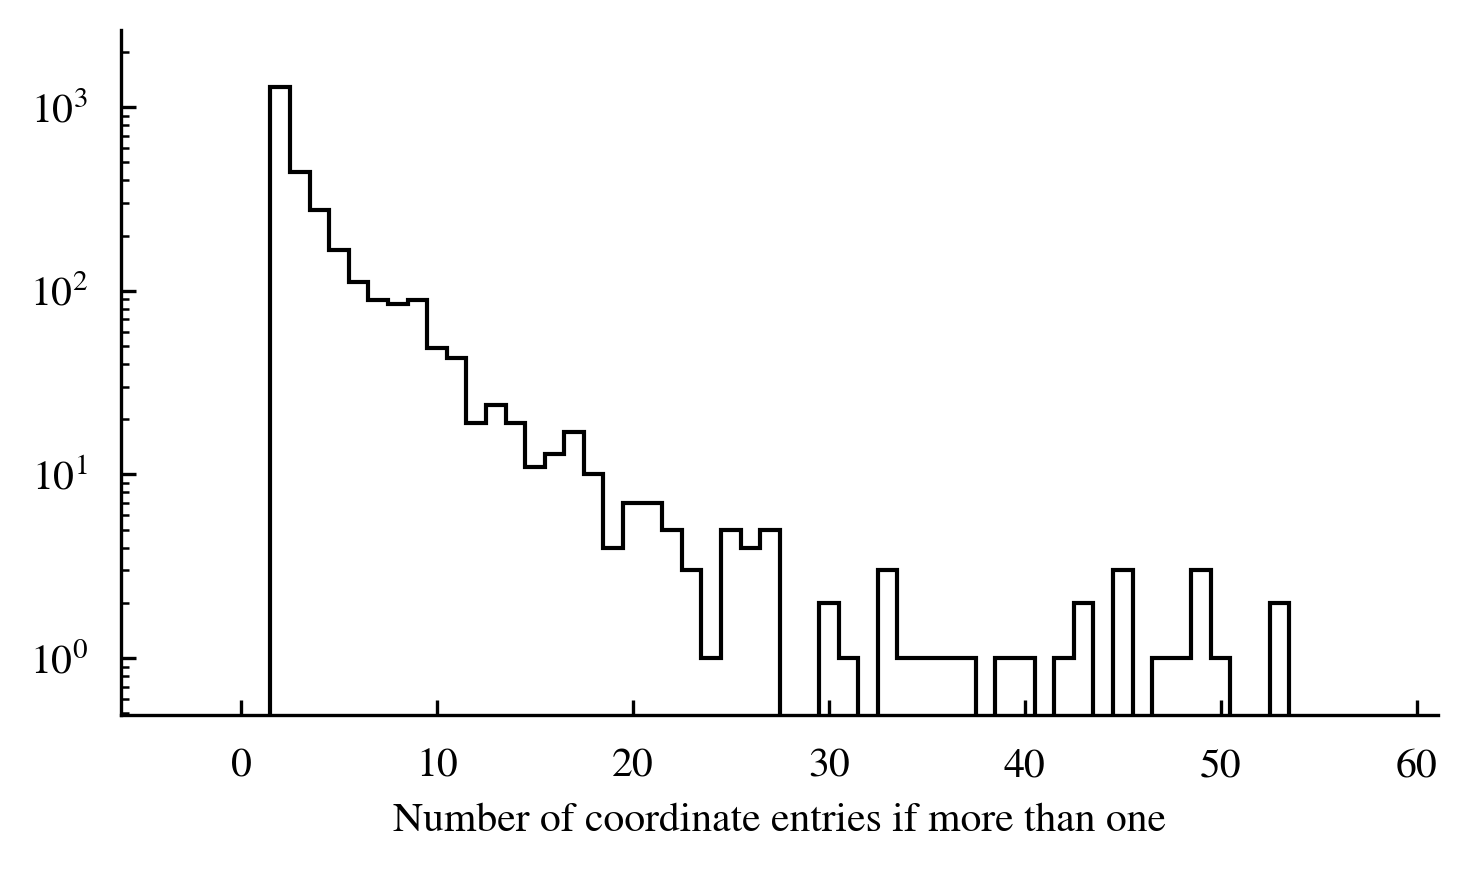

In [43]:
plt.figure(figsize=(5,3))
plt.hist(coolength,histtype="step",bins=np.arange(0,max(coolength)),align="left")
plt.yscale("log")
plt.xlabel("Number of coordinate entries if more than one")
plt.show()